<img src="Netflix_logo.webp">

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [29]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [35]:
# Subset the DataFrame to keep only the movies
movies_df = netflix_df[netflix_df["type"] == "Movie"]

# Filter the DataFrame for movies released between 1990 and 1999
duration = movies_df[(movies_df["release_year"] >= 1990) & (movies_df["release_year"] <= 1999)]

# Display the first few rows of the filtered DataFrame
duration.head()



,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


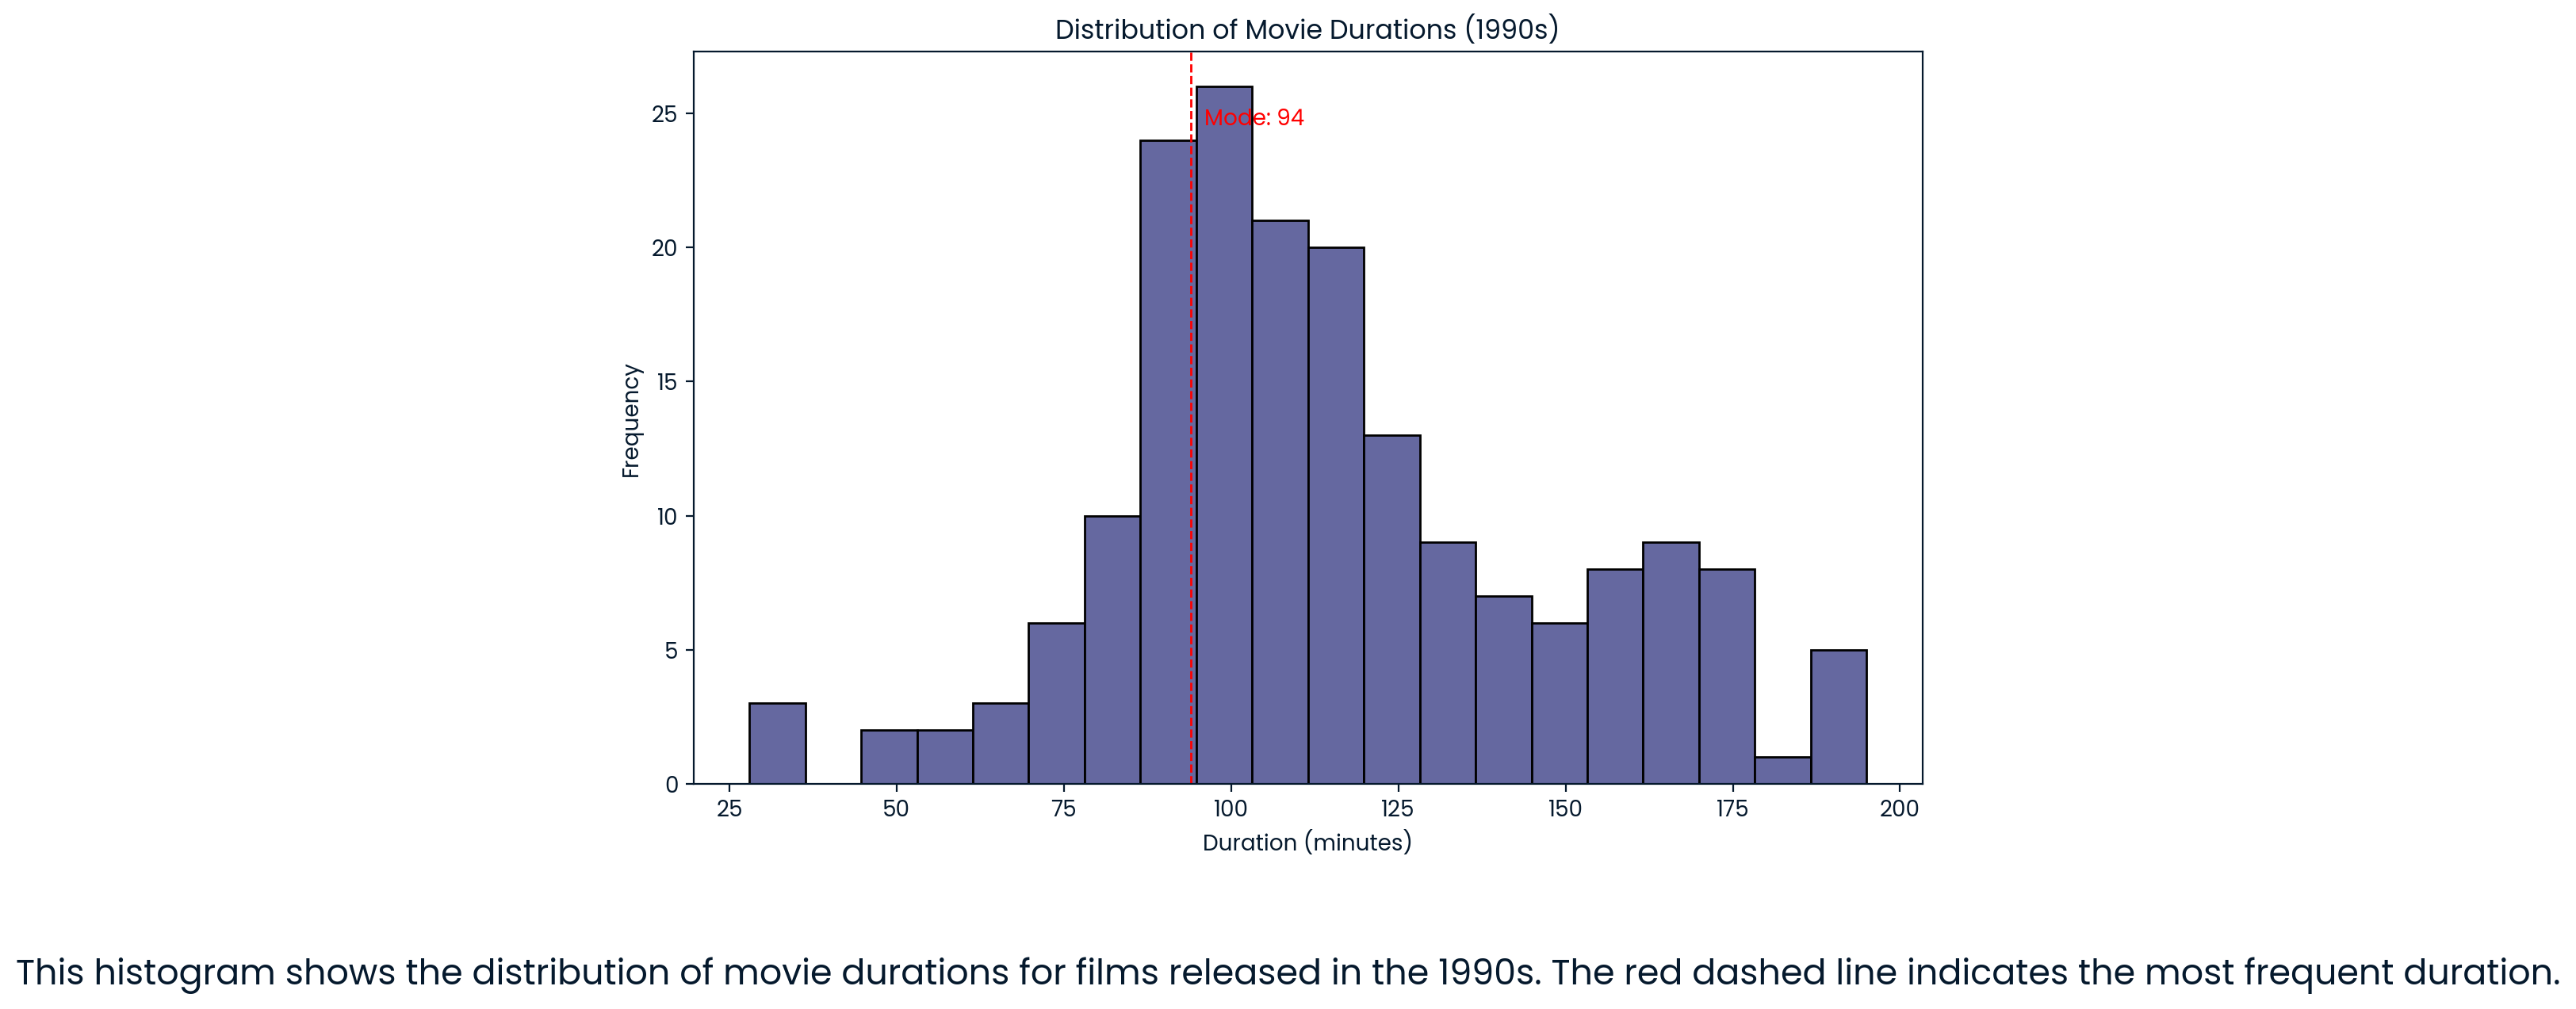

In [31]:
# Find the most frequent movie duration
most_frequent_duration = duration["duration"].mode()[0]

# Visualize the distribution of durations for movies released in the 1990s
plt.figure(figsize=(10, 6))
plt.hist(duration["duration"], bins=20, edgecolor='black')
plt.title("Distribution of Movie Durations (1990s)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.axvline(most_frequent_duration, color='r', linestyle='dashed', linewidth=1)
plt.text(most_frequent_duration + 2, plt.ylim()[1] * 0.9, f'Mode: {most_frequent_duration}', color='r')
plt.figtext(0.5, -0.1, "This histogram shows the distribution of movie durations for films released in the 1990s. The red dashed line indicates the most frequent duration.", wrap=True, horizontalalignment='center', fontsize=16)
plt.show()

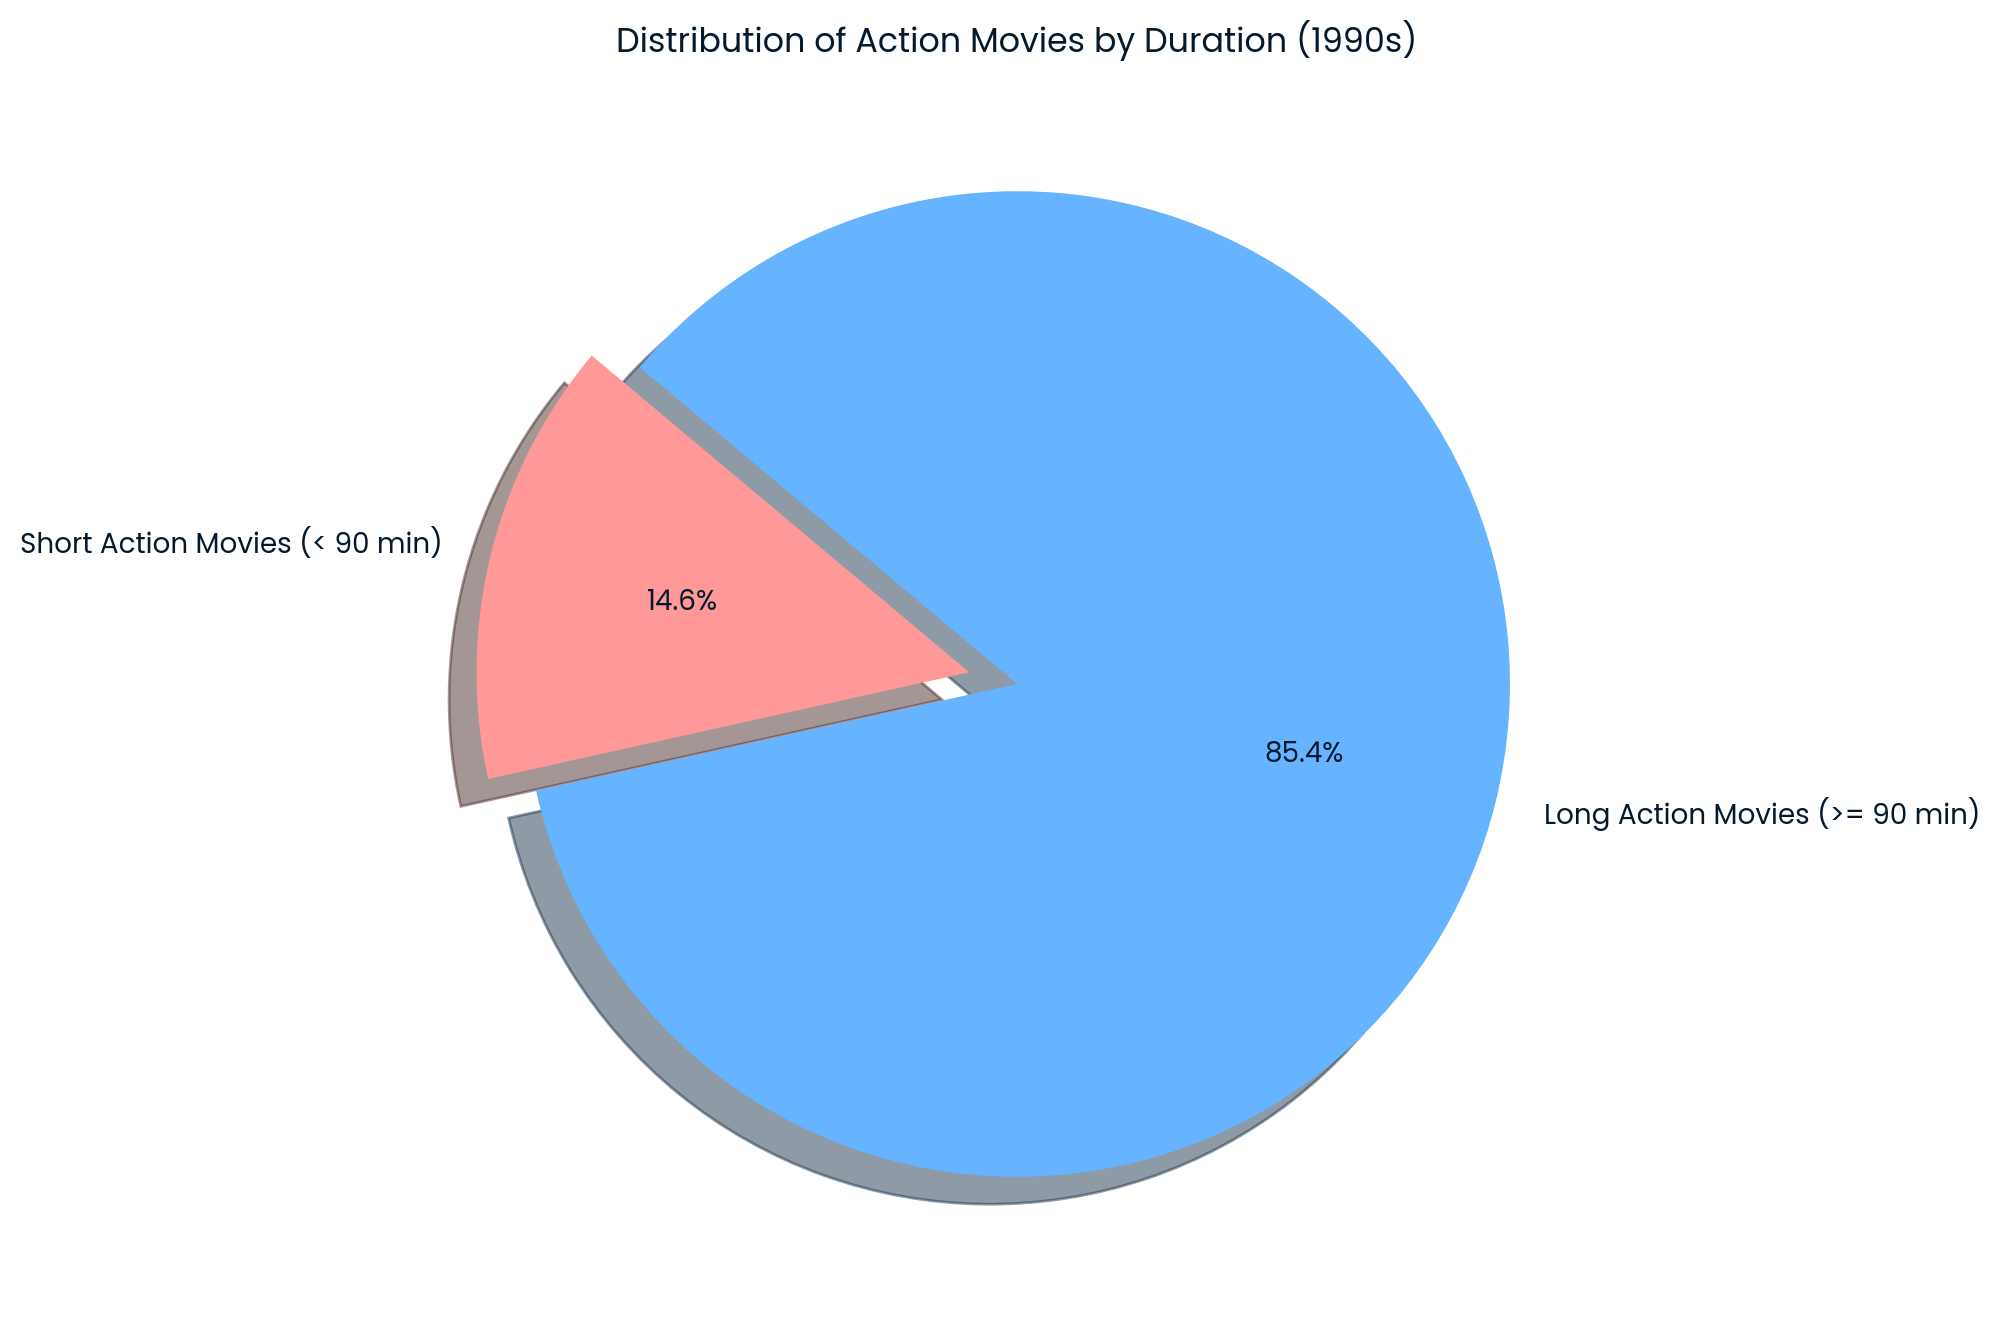

short action movies = 7
long action movies = 41


In [46]:
# Subset the DataFrame to keep only action movies
action_movies_90s_df = duration[duration["genre"].str.contains("Action", na=False)]

# Initialize a counter for short action movies
short_action_movies_count = 0

# Iterate through the DataFrame and count movies with duration less than 90 minutes
for index, row in action_movies_90s_df.iterrows():
    if row["duration"] < 90:
        short_action_movies_count += 1

# Calculate the number of action movies with duration 90 minutes or more
long_action_movies_count = len(action_movies_90s_df) - short_action_movies_count

# Plot a pie chart
labels = 'Short Action Movies (< 90 min)', 'Long Action Movies (>= 90 min)'
sizes = [short_action_movies_count, long_action_movies_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Distribution of Action Movies by Duration (1990s)')
plt.show()

print("short action movies =", short_action_movies_count)
print("long action movies =", long_action_movies_count)
